### Import important packages

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

### Read data from multiple CSVs

In [2]:
all_items = listdir('sales_data')
files = [f for f in all_items if '.csv' in f] # remove jupyter notebook folder.
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
# Create empty DF to store all data from CSVs
df = pd.DataFrame()

In [4]:
# Read all CSVs and store all in one DF
for f in files:
    full_path = f'sales_data\\{f}'
    if len(df.columns) == 0:
        df = pd.read_csv(full_path)
    else:
        df = df.append(pd.read_csv(full_path))

In [5]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean data, change to appropriate data type and create new useful columns.

In [6]:
# Check NA values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Change Quantity Ordered to integer
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
# Change Price Each to float
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
# Change Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [8]:
# Drop NA from initial data and after type changed.
df = df.dropna()

In [9]:
# Create Month from Order Date
df['Month'] = df['Order Date'].apply(lambda x: x.month)
# Create Hour
df['Hour'] = df['Order Date'].apply(lambda x: x.hour)
# Create Minute
df['Minute'] = df['Order Date'].apply(lambda x: x.minute)

In [10]:
# Create Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [11]:
# Create State cloumn
def get_state(x):
    return x.split(',')[2].split(' ')[1]

df['State'] = df['Purchase Address'].apply(lambda x: get_state(x))

In [12]:
# Create City column
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sales,State,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.90,TX,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.99,MA,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.00,CA,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99,CA,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99,CA,Los Angeles


### See best month for sales, and number of quantity ordered.

In [14]:
# Find highest number of orders
quantity = df.groupby('Month').sum()
quantity.sort_values('Quantity Ordered', ascending=False)[['Quantity Ordered']]

,Quantity Ordered
Month,
12,28114.0
10,22703.0
4,20558.0
11,19798.0
5,18667.0
3,17005.0
7,16072.0
6,15253.0
2,13449.0


From the information above we can see that the most order happened in December.

In [15]:
# Find highest number of Sales
df.groupby('Month').sum().sort_values('Sales', ascending=False)[['Sales']]

,Sales
Month,
12,4.613443e+06
10,3.736727e+06
4,3.390670e+06
11,3.199603e+06
5,3.152607e+06
3,2.807100e+06
7,2.647776e+06
6,2.577802e+06
8,2.244468e+06


Just like number of orders, the most sales happened in December.

### Visualizing with matplotlib

##### Quantity Ordered by Months

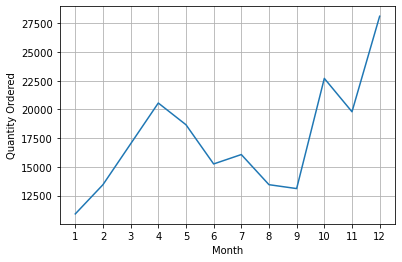

In [16]:
plt.plot(quantity['Quantity Ordered'])
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.show()

#### Sales by months

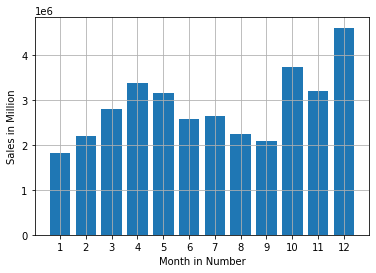

In [35]:
plt.bar(range(1,13), quantity['Sales'])
plt.xlabel('Month in Number')
plt.xticks(range(1, 13))
plt.ylabel('Sales in Million')
plt.grid(True)
plt.show()

##### Quantity Ordered by City

In [18]:
city_summary = df.groupby('City').sum().sort_values('Quantity Ordered')

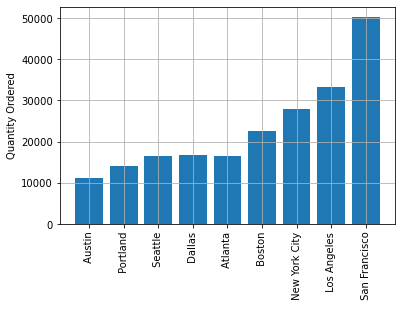

In [36]:
plt.bar(city_summary.index, city_summary['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

##### Sales by City

In [20]:
city_summary = city_summary.sort_values('Sales')

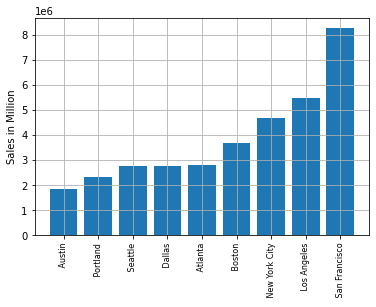

In [37]:
plt.bar(city_summary.index, city_summary['Sales'])
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in Million')
plt.grid(True)
plt.show()

##### Most sold products
From the analysis below, we find that most sold item is AAA Batteries (4-pack).

In [22]:
items_summary = df.groupby('Product').sum().sort_values('Quantity Ordered')

In [23]:
items_summary

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
Product,,,,,,
LG Dryer,646.0,387600.00,4383,9326,19043,387600.00
LG Washing Machine,666.0,399600.00,4523,9785,19462,399600.00
Vareebadd Phone,2068.0,826000.00,14309,29472,61835,827200.00
20in Monitor,4129.0,451068.99,29336,58764,122252,454148.71
ThinkPad Laptop,4130.0,4127958.72,28950,59746,121508,4129958.70
Macbook Pro Laptop,4728.0,8030800.00,33548,68261,137574,8037600.00
Flatscreen TV,4819.0,1440000.00,34224,68815,142789,1445700.00
Google Phone,5532.0,3315000.00,38305,79479,162773,3319200.00
34in Ultrawide Monitor,6199.0,2348718.19,43304,89076,183480,2355558.01


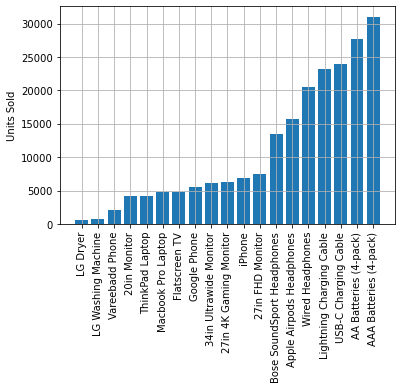

In [38]:
plt.bar(items_summary.index, items_summary['Quantity Ordered'], orientation='vertical')
plt.xticks(rotation='vertical')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

##### Quantity Ordered by State
From the analysis below, we can see that most products are ordered from CA.

In [25]:
state_summary = df.groupby('State').sum().sort_values('Quantity Ordered')

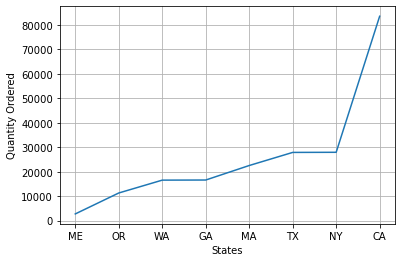

In [39]:
plt.plot(state_summary['Quantity Ordered'])
plt.xlabel('States')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()

#### Find best time to make advertisement

In [27]:
by_hour_summary = df.groupby('Hour').count()

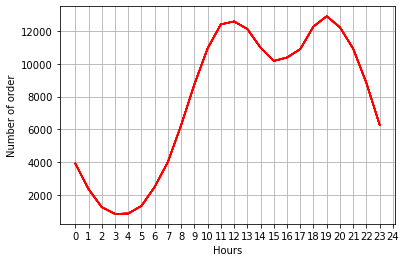

In [40]:
plt.plot(by_hour_summary, color='red')
plt.xlabel('Hours')
plt.ylabel('Number of order')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

The best time to make advertisement is before 6 AM to 9 AM after people start their activity.

### Find what items frequently sold together.

In [29]:
# Only use Order ID that with multiple item sold, and make sure the Order ID and Product is sorted
df_with_duplicate = df[df['Order ID'].duplicated(keep=False)].sort_values(['Order ID', 'Product'])
# To delete duplicate values
# df_with_duplicate.drop_duplicates('Order ID')

In [30]:
df_with_duplicate.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sales,State,City
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,6,11.95,TX,Austin
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,6,11.99,TX,Austin
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,25,11.52,CA,Los Angeles
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,25,150.00,CA,Los Angeles
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11,19,400.00,NY,New York City


In [31]:
# create column combination of items sold with same Order ID
df_with_duplicate['product_combinations'] = df_with_duplicate.groupby('Order ID')[['Product']].transform(lambda x: ','.join(x))

Because we already sorted the Product column we can be sure that there will be no combination of products with different order.

In [32]:
# Remove the combination of multiple Order ID after combining the Product for each Order ID.
df_with_duplicate.drop_duplicates('Order ID', inplace=True)

In [33]:
df_with_duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sales,State,City,product_combinations
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,6,11.95,TX,Austin,"USB-C Charging Cable,Wired Headphones"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,25,11.52,CA,Los Angeles,"AA Batteries (4-pack),Apple Airpods Headphones"
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11,19,400.00,NY,New York City,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1.0,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,0,14,600.00,MA,Boston,"Google Phone,USB-C Charging Cable"
221,141450,Bose SoundSport Headphones,1.0,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,11,16,99.99,CA,San Francisco,"Bose SoundSport Headphones,Google Phone"


In [34]:
# Get 10 combination of Product that sold together.
df_with_duplicate.groupby('product_combinations').count().sort_values('Order ID', ascending=False).head(10).iloc[:,2]

product_combinations
Lightning Charging Cable,iPhone                   891
Google Phone,USB-C Charging Cable                 868
Wired Headphones,iPhone                           374
USB-C Charging Cable,Vareebadd Phone              318
Google Phone,Wired Headphones                     311
Apple Airpods Headphones,iPhone                   299
Bose SoundSport Headphones,Google Phone           169
Vareebadd Phone,Wired Headphones                  110
AA Batteries (4-pack),Lightning Charging Cable    103
Lightning Charging Cable,USB-C Charging Cable      96
Name: Quantity Ordered, dtype: int64